In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Static inline plots
# %matplotlib inline

# External qt plots
# %matplotlib qt

# Interactive plots
%matplotlib notebook

import pandas as pd
import numpy as np
import scipy.signal
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from PIL import Image
import os

filePath = '../data/TomraData/day2'
# filePath = '../data/TomraData/day1/fillet'
# filePath = '../data/TomraData/day1/legmeat'
index = np.array([928, 932, 935, 939, 942, 946, 950, 953, 957, 960, 964, 968, 971, 975, 978, 982, 986, 989, 993, 997, 1000, 1004, 1007, 1011, 1015, 1018, 1022, 1025, 1029, 1033, 1036, 1040, 1043, 1047, 1051, 1054, 1058, 1061, 1065, 1069, 1072, 1076, 1079, 1083, 1087, 1090, 1094, 1097, 1101, 1105, 1108, 1112, 1115, 1119, 1123, 1126, 1130, 1134, 1137, 1141, 1144, 1148, 1152, 1155, 1159, 1162, 1166, 1170, 1173, 1177, 1180, 1184, 1188, 1191, 1195, 1198, 1202, 1206, 1209, 1213, 1216, 1220, 1224, 1227, 1231, 1234, 1238, 1242, 1245, 1249, 1252, 1256, 1260, 1263, 1267, 1271, 1274, 1278, 1281, 1285, 1289, 1292, 1296, 1299, 1303, 1307, 1310, 1314, 1317, 1321, 1325, 1328, 1332, 1335, 1339, 1343, 1346, 1350, 1353, 1357, 1361, 1364, 1368, 1371, 1375, 1379, 1382, 1386, 1390, 1393, 1397, 1400, 1404, 1408, 1411, 1415, 1418, 1422, 1426, 1429, 1433, 1436, 1440, 1444, 1447, 1451, 1454, 1458, 1462, 1465, 1469, 1472, 1476, 1480, 1483, 1487, 1490, 1494, 1498, 1501, 1505, 1508, 1512, 1516, 1519, 1523, 1527, 1530, 1534, 1537, 1541, 1545, 1548, 1552, 1555, 1559, 1563, 1566, 1570, 1573, 1577, 1581, 1584, 1588, 1591, 1595, 1599, 1602, 1606, 1609, 1613, 1617, 1620, 1624, 1627, 1631, 1635, 1638, 1642, 1645, 1649, 1653, 1656, 1660, 1664, 1667, 1671, 1674])

In [2]:
def read_all():
    data = {}

    # Read all file in folder
    for fileName in os.listdir(filePath):
        if '.mat' in fileName:
            fullFileName = os.path.join(filePath, fileName)
            matlab_mat = loadmat(fullFileName)
            data[fileName[:-4]] = np.array(matlab_mat['image'])
    
    return data
        
data = read_all()

In [3]:
def cut_images_to_100x100(data, path):
    if "day2" in path:
        # The easiest - the first iteration
        data['20200213_120308_FM_fillet_repeat_sample_B_36'] = data['20200213_120308_FM_fillet_repeat_sample_B_36'][40:140, 10:110]
        data['20200213_120339_FM_fillet_repeat_sample_B_37'] = data['20200213_120339_FM_fillet_repeat_sample_B_37'][60:160, 10:110]
        data['20200213_120359_FM_fillet_repeat_sample_B_38'] = data['20200213_120359_FM_fillet_repeat_sample_B_38'][35:135, 10:110]
        data['20200213_120111_FM_fillet_repeat_sample_B_33'] = data['20200213_120111_FM_fillet_repeat_sample_B_33'][60:160, 10:110]

        # Next iteration
        data['20200213_115827_FM_fillet_repeat_sample_B_28'] = data['20200213_115827_FM_fillet_repeat_sample_B_28'][60:160, 10:110]
        data['20200213_114922_skinside_sample_B_21'] = data['20200213_114922_skinside_sample_B_21'][60:160, 10:110]
        data['20200213_114942_skinside_sample_B_22'] = data['20200213_114942_skinside_sample_B_22'][60:160, 0:100]
        data['20200213_115010_skinside_sample_B_23'] = data['20200213_115010_skinside_sample_B_23'][70:170, 0:100]
        data['20200213_115055_skinside_sample_B_25'] = data['20200213_115055_skinside_sample_B_25'][60:160, 0:100]
        data['20200213_115955_FM_fillet_repeat_sample_B_31'] = data['20200213_115955_FM_fillet_repeat_sample_B_31'][30:130, 10:110]
        data['20200213_120912_new_FM_fillet_sample_C_22'] = data['20200213_120912_new_FM_fillet_sample_C_22'][27:127, 0:100]
        data['20200213_121438_new_FM_fillet_sample_C_31'] = data['20200213_121438_new_FM_fillet_sample_C_31'][100:200, 10:110]
        data['20200213_121453_new_FM_fillet_sample_C_32'] = data['20200213_121453_new_FM_fillet_sample_C_32'][20:120, 10:110]

        # Final iteration
        data['20200213_113311_fillet_sample20'] = data['20200213_113311_fillet_sample20'][70:170, 0:100]
        data['20200213_113428_fillet_sample21'] = data['20200213_113428_fillet_sample21'][70:170, 0:100]
        data['20200213_113459_fillet_sample22'] = data['20200213_113459_fillet_sample22'][40:140, 0:100]
        data['20200213_113531_fillet_sample23'] = data['20200213_113531_fillet_sample23'][35:135, 0:100]
        data['20200213_113617_fillet_sample24'] = data['20200213_113617_fillet_sample24'][80:180, 10:110]
        data['20200213_113632_fillet_sample25'] = data['20200213_113632_fillet_sample25'][45:145, 10:110]
        data['20200213_113646_fillet_sample26'] = data['20200213_113646_fillet_sample26'][50:150, 10:110]
        data['20200213_113705_fillet_sample27'] = data['20200213_113705_fillet_sample27'][50:150, 10:110]
        data['20200213_113719_fillet_sample28'] = data['20200213_113719_fillet_sample28'][50:150, 0:100]
        data['20200213_113731_fillet_sample29'] = data['20200213_113731_fillet_sample29'][50:150, 0:100]
        data['20200213_113826_fillet_sample30'] = data['20200213_113826_fillet_sample30'][40:140, 0:100]
        data['20200213_113854_fillet_sample31'] = data['20200213_113854_fillet_sample31'][50:150, 0:100]
        data['20200213_113925_fillet_sample32'] = data['20200213_113925_fillet_sample32'][70:170, 0:100]
        data['20200213_113949_fillet_sample33'] = data['20200213_113949_fillet_sample33'][45:145, 0:100]
        data['20200213_114007_fillet_sample34'] = data['20200213_114007_fillet_sample34'][50:150, 10:110]
        data['20200213_114025_fillet_sample35'] = data['20200213_114025_fillet_sample35'][50:150, 0:100]
        data['20200213_114052_fillet_sample36'] = data['20200213_114052_fillet_sample36'][45:145, 0:100]
        data['20200213_114111_fillet_sample37'] = data['20200213_114111_fillet_sample37'][45:145, 0:100]
        data['20200213_114129_fillet_sample38'] = data['20200213_114129_fillet_sample38'][60:160, 0:100]
        data['20200213_114148_fillet_sample39'] = data['20200213_114148_fillet_sample39'][50:150, 0:100]
        data['20200213_114322_fillet_sample40'] = data['20200213_114322_fillet_sample40'][60:160, 0:100]
        data['20200213_114347_fillet_sample41'] = data['20200213_114347_fillet_sample41'][40:140, 10:110]
        data['20200213_114414_fillet_sample42'] = data['20200213_114414_fillet_sample42'][50:150, 0:100]
        data['20200213_114437_fillet_sample43'] = data['20200213_114437_fillet_sample43'][65:165, 0:100]
        data['20200213_114502_fillet_sample44'] = data['20200213_114502_fillet_sample44'][50:150, 0:100]
        data['20200213_114523_fillet_sample45'] = data['20200213_114523_fillet_sample45'][85:185, 0:100]
        data['20200213_114552_fillet_sample46'] = data['20200213_114552_fillet_sample46'][45:145, 0:100]
        data['20200213_114611_fillet_sample47'] = data['20200213_114611_fillet_sample47'][55:155, 0:100]
        data['20200213_114630_fillet_sample48'] = data['20200213_114630_fillet_sample48'][50:150, 0:100]
        data['20200213_114648_fillet_sample49'] = data['20200213_114648_fillet_sample49'][50:150, 0:100]
        data['20200213_114807_fillet_sample50'] = data['20200213_114807_fillet_sample50'][45:145, 0:100]
        data['20200213_114857_skinside_sample_B_20'] = data['20200213_114857_skinside_sample_B_20'][50:150, 0:100]
        data['20200213_115030_skinside_sample_B_24'] = data['20200213_115030_skinside_sample_B_24'][60:160, 0:100]
        data['20200213_115118_skinside_sample_B_26'] = data['20200213_115118_skinside_sample_B_26'][75:175, 0:100]
        data['20200213_115201_skinside_sample_B_27'] = data['20200213_115201_skinside_sample_B_27'][50:150, 10:110]
        data['20200213_115234_skinside_sample_B_28'] = data['20200213_115234_skinside_sample_B_28'][50:150, 10:110]
        data['20200213_115449_FM_fillet_repeat_sample_B_20'] = data['20200213_115449_FM_fillet_repeat_sample_B_20'][70:170, 0:100]
        data['20200213_115538_FM_fillet_repeat_sample_B_21'] = data['20200213_115538_FM_fillet_repeat_sample_B_21'][45:145, 10:110]
        data['20200213_115559_FM_fillet_repeat_sample_B_22'] = data['20200213_115559_FM_fillet_repeat_sample_B_22'][30:130, 0:100]
        data['20200213_115625_FM_fillet_repeat_sample_B_23'] = data['20200213_115625_FM_fillet_repeat_sample_B_23'][50:150, 0:100]
        data['20200213_115648_FM_fillet_repeat_sample_B_24'] = data['20200213_115648_FM_fillet_repeat_sample_B_24'][70:170, 10:110]
        data['20200213_115706_FM_fillet_repeat_sample_B_25'] = data['20200213_115706_FM_fillet_repeat_sample_B_25'][40:140, 10:110]
        data['20200213_115743_FM_fillet_repeat_sample_B_26'] = data['20200213_115743_FM_fillet_repeat_sample_B_26'][55:155, 0:100]
        data['20200213_115808_FM_fillet_repeat_sample_B_27'] = data['20200213_115808_FM_fillet_repeat_sample_B_27'][60:160, 10:110]
        data['20200213_115916_FM_fillet_repeat_sample_B_29'] = data['20200213_115916_FM_fillet_repeat_sample_B_29'][80:180, 10:110]
        data['20200213_115939_FM_fillet_repeat_sample_B_30'] = data['20200213_115939_FM_fillet_repeat_sample_B_30'][30:130, 0:100]
        data['20200213_120044_FM_fillet_repeat_sample_B_32'] = data['20200213_120044_FM_fillet_repeat_sample_B_32'][40:140, 0:100]
        data['20200213_120158_FM_fillet_repeat_sample_B_34'] = data['20200213_120158_FM_fillet_repeat_sample_B_34'][40:140, 10:110]
        data['20200213_120225_FM_fillet_repeat_sample_B_35'] = data['20200213_120225_FM_fillet_repeat_sample_B_35'][45:145, 10:110]
        data['20200213_120821_new_FM_fillet_sample_C_20'] = data['20200213_120821_new_FM_fillet_sample_C_20'][40:140, 10:110]
        data['20200213_120849_new_FM_fillet_sample_C_21'] = data['20200213_120849_new_FM_fillet_sample_C_21'][40:140, 0:100]
        data['20200213_120956_new_FM_fillet_sample_C_23'] = data['20200213_120956_new_FM_fillet_sample_C_23'][75:175, 10:110]
        data['20200213_121023_new_FM_fillet_sample_C_24'] = data['20200213_121023_new_FM_fillet_sample_C_24'][50:150, 0:100]
        data['20200213_121045_new_FM_fillet_sample_C_25'] = data['20200213_121045_new_FM_fillet_sample_C_25'][50:150, 10:110]
        data['20200213_121142_new_FM_fillet_sample_C_26'] = data['20200213_121142_new_FM_fillet_sample_C_26'][75:175, 0:100]
        data['20200213_121213_new_FM_fillet_sample_C_27'] = data['20200213_121213_new_FM_fillet_sample_C_27'][55:155, 0:100]
        data['20200213_121237_new_FM_fillet_sample_C_28'] = data['20200213_121237_new_FM_fillet_sample_C_28'][75:175, 0:100]
        data['20200213_121354_new_FM_fillet_sample_C_29'] = data['20200213_121354_new_FM_fillet_sample_C_29'][55:155, 0:100]
        data['20200213_121417_new_FM_fillet_sample_C_30'] = data['20200213_121417_new_FM_fillet_sample_C_30'][40:140, 0:100]
        
    elif "day1/fillet" in path:
        data['FM_02']   = data['FM_02'][50:150, 0:100]
        data['FM_03']   = data['FM_03'][50:150, 0:100]
        data['FM_04']   = data['FM_04'][55:155, 0:100]
        data['FM_05']   = data['FM_05'][55:155, 0:100]
        data['FM_06']   = data['FM_06'][50:150, 0:100]
        data['FM_07']   = data['FM_07'][50:150, 0:100]
        data['FM_08']   = data['FM_08'][70:170, 0:100]
        data['FM_09']   = data['FM_09'][50:150, 0:100]
        data['FM_10']   = data['FM_10'][50:150, 0:100]
        data['FM_11']   = data['FM_11'][50:150, 0:100]
        data['chicken_01']  = data['chicken_01'][30:130, 10:110]
        data['chicken_02']  = data['chicken_02'][65:165, 0:100]
        data['chicken_03']  = data['chicken_03'][40:140, 0:100]
        data['chicken_04']  = data['chicken_04'][55:155, 0:100]
        data['chicken_05']  = data['chicken_05'][40:140, 16:116]
        data['fillet_FM_01']    = data['fillet_FM_01'][70:170, 0:100]
        data['fillet_FM_02']    = data['fillet_FM_02'][50:150, 10:110]
        data['fillet_FM_03']    = data['fillet_FM_03'][50:150, 0:100]
        data['fillet_FM_05']    = data['fillet_FM_05'][70:170, 10:110]
        data['fillet_FM_06']    = data['fillet_FM_06'][70:170, 10:110]
        data['fillet_FM_07']    = data['fillet_FM_07'][70:170, 0:100]
        data['fillet_FM_08']    = data['fillet_FM_08'][70:170, 10:110]
        data['fillet_FM_09']    = data['fillet_FM_09'][70:170, 0:100]
        data['fillet_FM_10']    = data['fillet_FM_10'][70:170, 10:110]
        data['fillet_FM_11']    = data['fillet_FM_11'][70:170, 10:110]
        data['fillet_FM_12']    = data['fillet_FM_12'][70:170, 0:100]
        data['fillet_v2_FM_01']     = data['fillet_v2_FM_01'][70:170, 10:110]
        data['fillet_v2_FM_02']     = data['fillet_v2_FM_02'][70:170, 0:100]
        data['fillet_v2_FM_03']     = data['fillet_v2_FM_03'][70:170, 0:100]
        data['fillet_v2_FM_04']     = data['fillet_v2_FM_04'][70:170, 10:110]
        data['fillet_v2_FM_05']     = data['fillet_v2_FM_05'][70:170, 10:110]
        data['fillet_v2_FM_06']     = data['fillet_v2_FM_06'][70:170, 0:100]
        data['fillet_v2_FM_07']     = data['fillet_v2_FM_07'][70:170, 10:110]
        data['fillet_v2_FM_08']     = data['fillet_v2_FM_08'][70:170, 0:100]
        data['fillet_v2_FM_09']     = data['fillet_v2_FM_09'][70:170, 0:100]
        data['fillet_v2_FM_10']     = data['fillet_v2_FM_10'][70:170, 10:110]
        data['fillet_v2_FM_11']     = data['fillet_v2_FM_11'][70:170, 10:110]

    elif "day1/legmeat" in path:
        data['leg_meat_FM_01'] = data['leg_meat_FM_01'][70:170, 0:100]
        data['leg_meat_FM_02'] = data['leg_meat_FM_02'][70:170, 10:110]
        data['leg_meat_FM_03'] = data['leg_meat_FM_03'][50:150, 0:100]
        data['leg_meat_FM_04'] = data['leg_meat_FM_04'][50:150, 0:100]
        data['leg_meat_FM_05'] = data['leg_meat_FM_05'][70:170, 10:110]
        data['leg_meat_FM_06'] = data['leg_meat_FM_06'][70:170, 10:110]
        data['leg_meat_FM_07'] = data['leg_meat_FM_07'][60:160, 10:110]
        data['leg_meat_FM_08'] = data['leg_meat_FM_08'][70:170, 10:110]
        data['leg_meat_FM_09'] = data['leg_meat_FM_09'][50:150, 0:100]
        data['leg_meat_FM_10'] = data['leg_meat_FM_10'][50:150, 10:110]
        data['leg_meat_FM_11'] = data['leg_meat_FM_11'][70:170, 10:110]
        data['leg_skin_FM_01'] = data['leg_skin_FM_01'][60:160, 10:110]
        data['leg_skin_FM_02'] = data['leg_skin_FM_02'][50:150, 10:110]
        data['leg_skin_FM_03'] = data['leg_skin_FM_03'][75:175, 0:100]
        data['leg_skin_FM_04'] = data['leg_skin_FM_04'][70:170, 10:110]
        data['leg_skin_FM_05'] = data['leg_skin_FM_05'][50:150, 10:110]
        data['leg_skin_FM_06'] = data['leg_skin_FM_06'][50:150, 10:110]
        data['leg_skin_FM_07'] = data['leg_skin_FM_07'][70:170, 10:110]
        data['leg_skin_FM_08'] = data['leg_skin_FM_08'][75:175, 10:110]
        data['leg_skin_FM_09'] = data['leg_skin_FM_09'][75:175, 10:110]
        data['leg_skin_FM_10'] = data['leg_skin_FM_10'][75:175, 10:110]
        data['leg_skin_FM_11'] = data['leg_skin_FM_11'][75:175, 0:100]
        data['legs_meatside_01'] = data['legs_meatside_01'][60:160, 10:110]
        data['legs_meatside_02'] = data['legs_meatside_02'][60:160, 10:110]
        data['legs_meatside_03'] = data['legs_meatside_03'][60:160, 0:100]
        data['legs_meatside_04'] = data['legs_meatside_04'][50:150, 0:100]
        data['legs_skinside_01'] = data['legs_skinside_01'][100:200, 10:110]
        data['legs_skinside_04'] = data['legs_skinside_04'][75:175, 0:100]
        data['legs_skinside_05'] = data['legs_skinside_05'][50:150, 0:100]

        data['legs_skinside_12'] = data['legs_skinside_02'][25:125, 0:100]
        data['legs_skinside_22'] = data['legs_skinside_02'][100:200, 10:110]
        del data['legs_skinside_02']
        data['legs_skinside_13'] = data['legs_skinside_03'][10:110, 10:110]
        data['legs_skinside_23'] = data['legs_skinside_03'][100:200, 10:110]
        del data['legs_skinside_03']

    return data
            
data = cut_images_to_100x100(data, filePath)

In [4]:
np.max(data["20200213_120308_FM_fillet_repeat_sample_B_36"])

53.83974075317383

In [7]:
np.arange(65, 120, 5)

array([ 65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115])

R:58 G:100 B:189


<IPython.core.display.Javascript object>


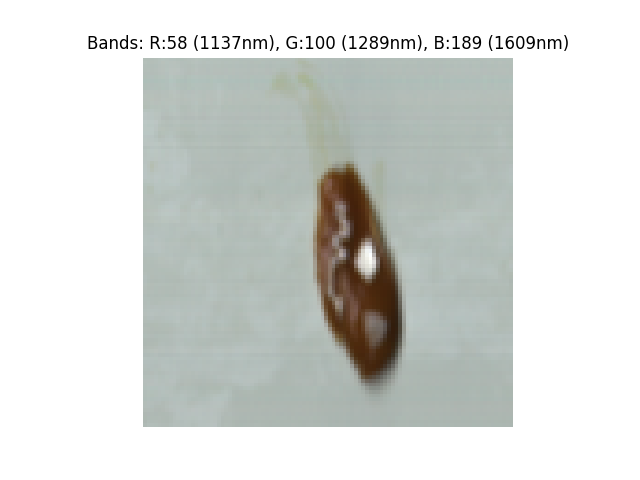

In [50]:
# TODO: Try this https://www.spectralpython.net/graphics.html
# from spectral import *
# img = open_image('92AV3C.lan')
# view = imshow(img, (29, 19, 9))

from skimage import exposure

def RGBplot(img_data, R, G, B):
    
    #Pre-allocate array  size
    rgbArray = np.zeros((img_data.shape[0], img_data.shape[1], 3), 'uint8')
    
    rgbArray[..., 0] = img_data[:,:, R]*255/img_data[:,:, R].max()
    rgbArray[..., 1] = img_data[:,:, G]*255/img_data[:,:, G].max()
    rgbArray[..., 2] = img_data[:,:, B]*255/img_data[:,:, B].max()
    
    # Apply Adaptive Histogram Equalization to Improve Contrast:
    # rgbArray = exposure.equalize_adapthist(rgbArray)
    
    plt.figure()
    plot = plt.imshow(rgbArray)
    plt.axis('off')
    plt.title('Bands: R:' + str(R) + ' (' + str(round(index[R])) +'nm), G:' + str(G) + ' (' + str(round(index[G])) + 'nm), B:' + str(B) + ' (' + str(round(index[B])) + 'nm)'); 
#     ax = plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') 
#     rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) 
    
# Out of these [8, 39, 140, 58, 65, 96, 112, 150, 189] the best was obtained with {R:58,G:65,B:189}{R:58,G:96,B:189}{R:58,G:112,B:189} obtained with itertools.permutations(numbers, 3):
# image = np.log10(1/data["20200213_120308_FM_fillet_repeat_sample_B_36"])
image = data["20200213_120308_FM_fillet_repeat_sample_B_36"]
R, G, B = 58, 100, 189
print(f"R:{R} G:{G} B:{B}")
RGBplot(image, R=R, G=G, B=B)
# plt.savefig("RGB_image.png")

In [46]:
help(np.unique)

Help on function unique in module numpy:

unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)
    Find the unique elements of an array.
    
    Returns the sorted unique elements of an array. There are three optional
    outputs in addition to the unique elements:
    
    * the indices of the input array that give the unique values
    * the indices of the unique array that reconstruct the input array
    * the number of times each unique value comes up in the input array
    
    Parameters
    ----------
    ar : array_like
        Input array. Unless `axis` is specified, this will be flattened if it
        is not already 1-D.
    return_index : bool, optional
        If True, also return the indices of `ar` (along the specified axis,
        if provided, or in the flattened array) that result in the unique array.
    return_inverse : bool, optional
        If True, also return the indices of the unique array (for the specified
        axis, if pro

In [30]:
np.ceil(0.1), 2**8

(1.0, 256)

In [19]:
image[:, :, 58].min(), image[:, :, 58].max()

(9.675272941589355, 52.145660400390625)

In [21]:
image[:, :, 100].min(), image[:, :, 100].max()

(5.879950523376465, 52.76870346069336)

In [22]:
image[:, :, 189].min(), image[:, :, 189].max()

(2.0561180114746094, 48.68344497680664)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


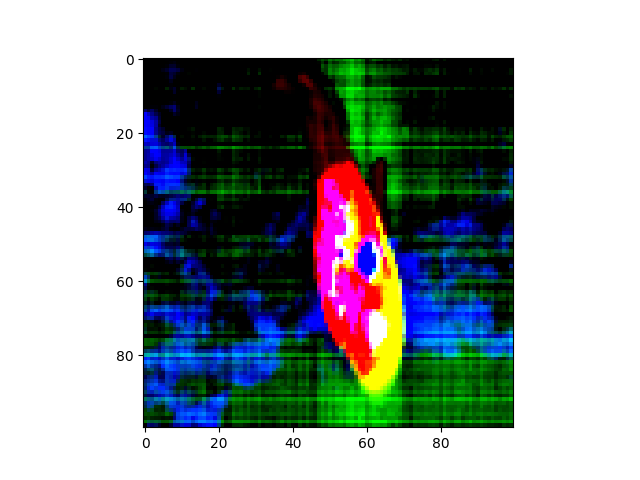

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [39]:
import mypackage
pca_image, _ = mypackage.Dataset.PCA(np.array([image]), X_test=None, n_components=6, whiten=True)
pca_image = np.squeeze(pca_image)
plt.figure()
plt.imshow(pca_image[:, :, 0:3])

In [5]:
# https://stackoverflow.com/questions/40600205/saving-a-multipage-tiff-using-pil
def save_array_as_image(data, fileName):
    '''This function is needed since the following does not work
            # img = Image.fromarray(np.asarray(transImage))
    '''
    n, m, k = data.shape
    if n != 100 or m !=100 or k !=208:
        raise ValueError(f"The image dimensions are incorrect. Got ({n}, {m}, {k}), but should have been (100, 100, 208)")
    imlist = []
    for i in range(data.shape[-1]):
        imlist.append(Image.fromarray(data[:, :, i]))

    imlist[0].save(fileName, compression=None, save_all=True,
                   append_images=imlist[1:])

# save_array_as_image(np.array([[[1,2,2]]]), "test.tif")


In [6]:
names = list(data.keys())
names.sort()
names

['FM_02',
 'FM_03',
 'FM_04',
 'FM_05',
 'FM_06',
 'FM_07',
 'FM_08',
 'FM_09',
 'FM_10',
 'FM_11',
 'chicken_01',
 'chicken_02',
 'chicken_03',
 'chicken_04',
 'chicken_05',
 'fillet_FM_01',
 'fillet_FM_02',
 'fillet_FM_03',
 'fillet_FM_05',
 'fillet_FM_06',
 'fillet_FM_07',
 'fillet_FM_08',
 'fillet_FM_09',
 'fillet_FM_10',
 'fillet_FM_11',
 'fillet_FM_12',
 'fillet_v2_FM_01',
 'fillet_v2_FM_02',
 'fillet_v2_FM_03',
 'fillet_v2_FM_04',
 'fillet_v2_FM_05',
 'fillet_v2_FM_06',
 'fillet_v2_FM_07',
 'fillet_v2_FM_08',
 'fillet_v2_FM_09',
 'fillet_v2_FM_10',
 'fillet_v2_FM_11']

<IPython.core.display.Javascript object>


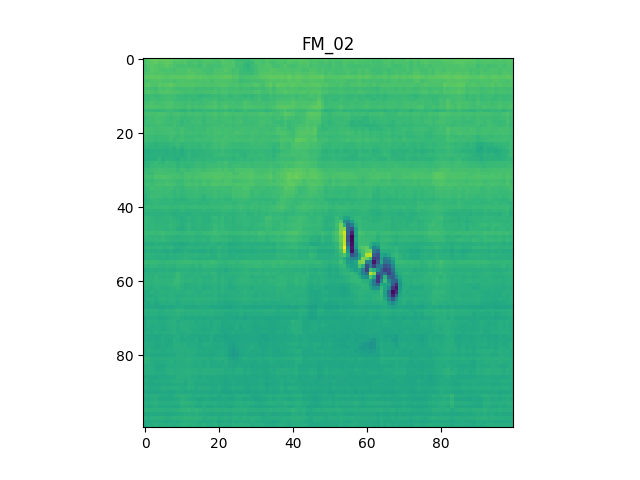

FM_02


<IPython.core.display.Javascript object>


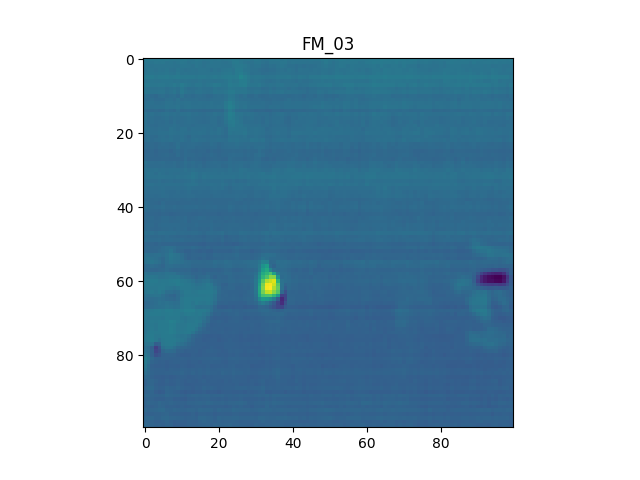

FM_03


<IPython.core.display.Javascript object>


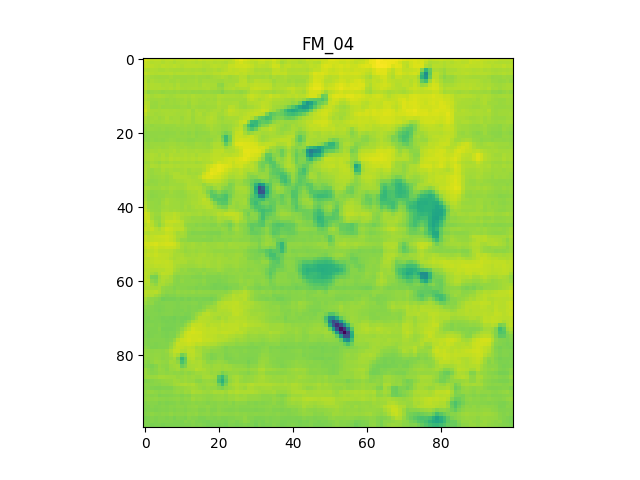

FM_04


<IPython.core.display.Javascript object>


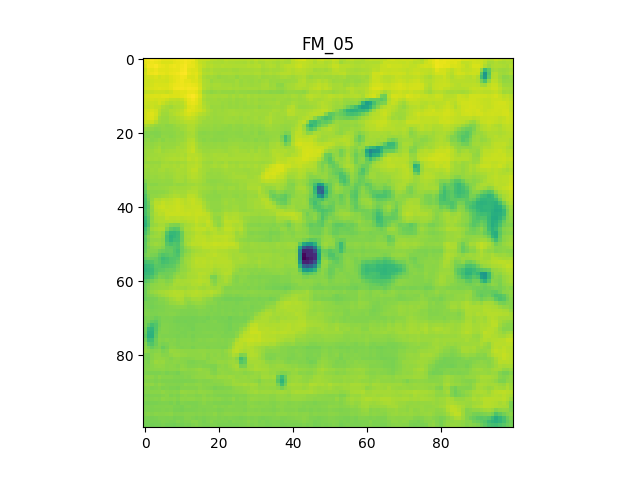

FM_05


<IPython.core.display.Javascript object>


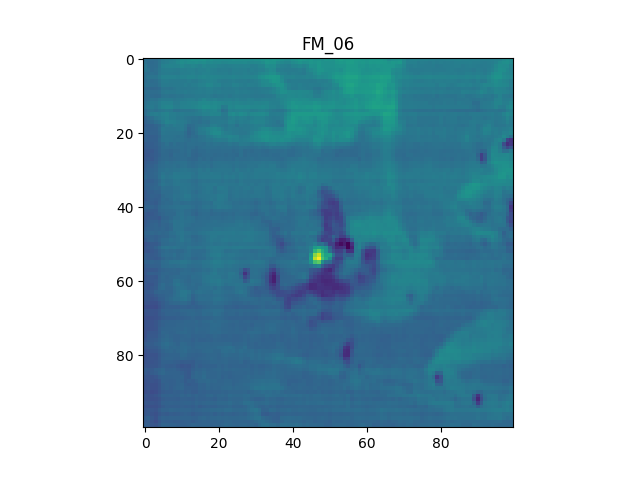

FM_06


<IPython.core.display.Javascript object>


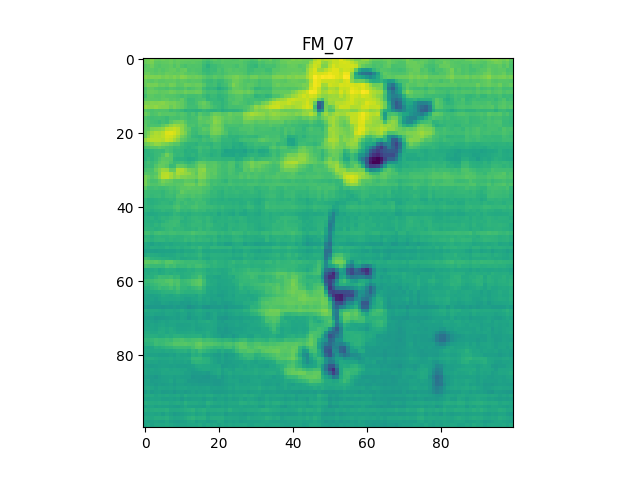

FM_07


<IPython.core.display.Javascript object>


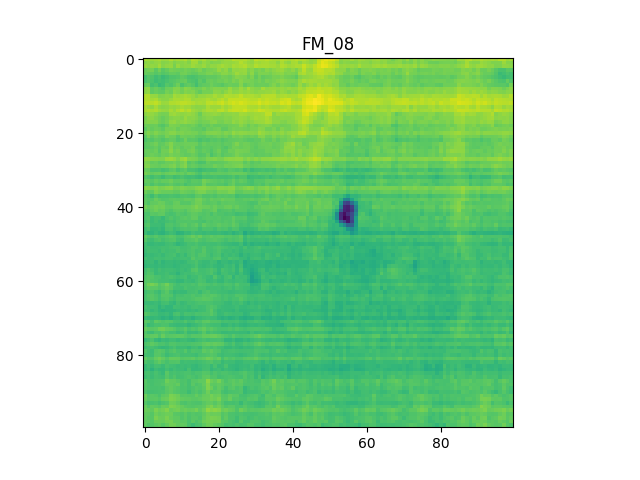

FM_08


<IPython.core.display.Javascript object>


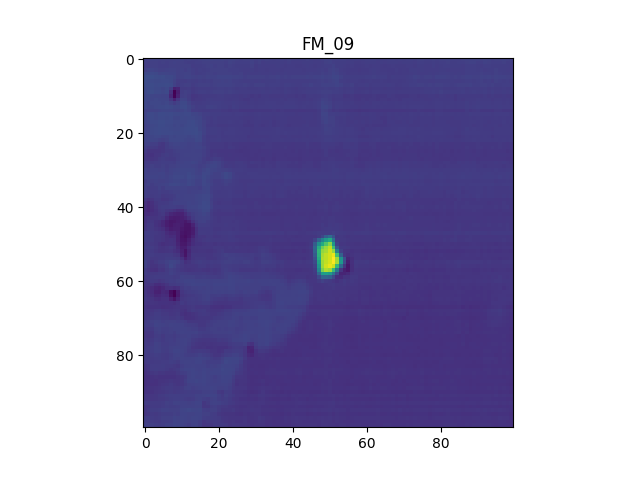

FM_09


<IPython.core.display.Javascript object>


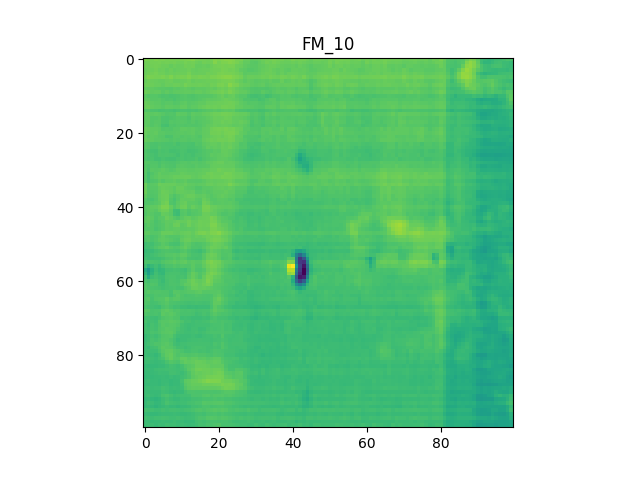

FM_10


<IPython.core.display.Javascript object>


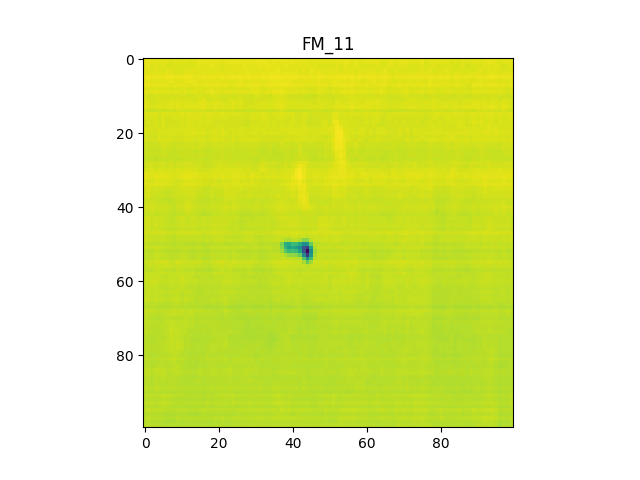

FM_11


<IPython.core.display.Javascript object>


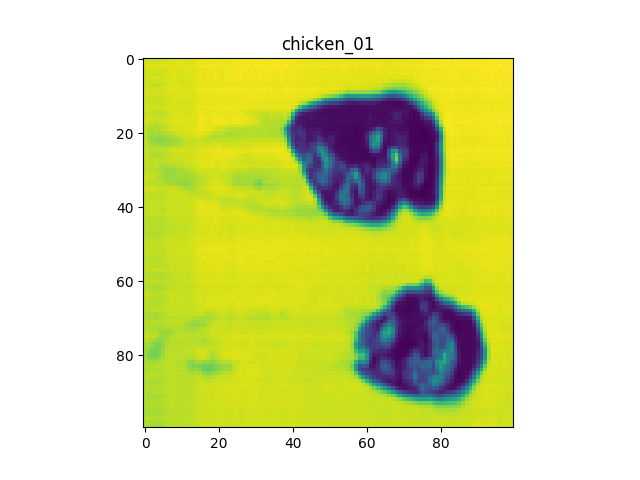

chicken_01


<IPython.core.display.Javascript object>


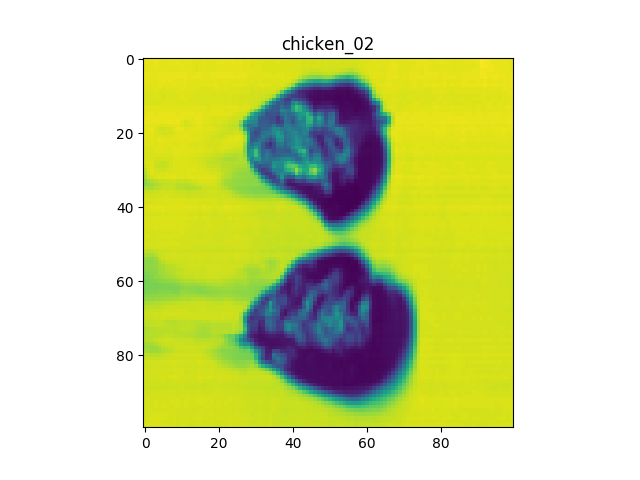

chicken_02


<IPython.core.display.Javascript object>


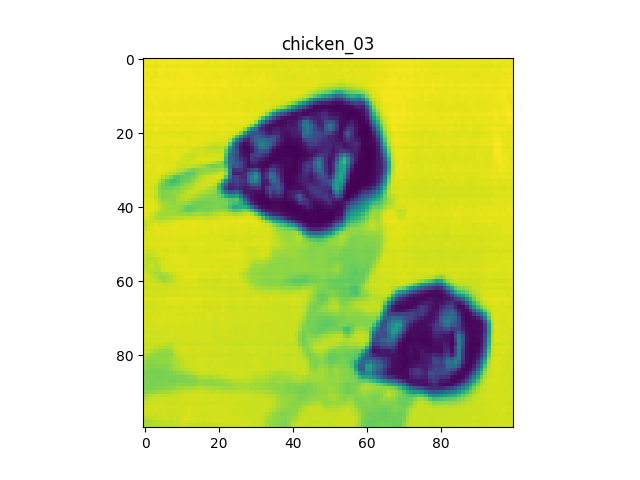

chicken_03


<IPython.core.display.Javascript object>


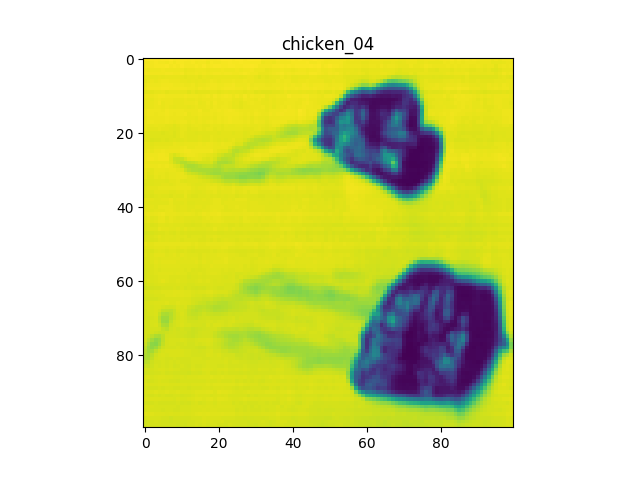

chicken_04


<IPython.core.display.Javascript object>


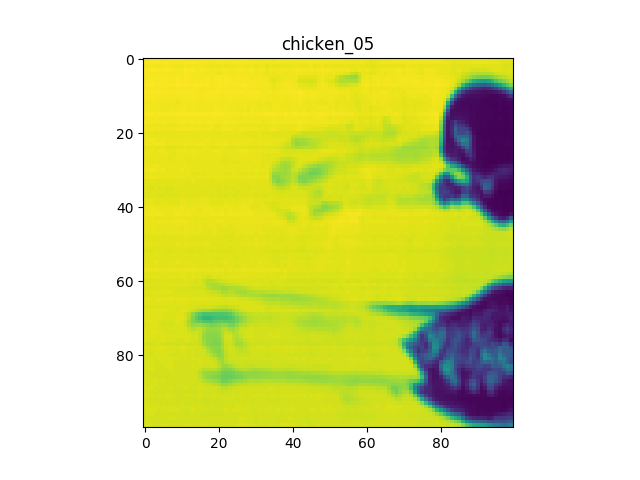

chicken_05


<IPython.core.display.Javascript object>


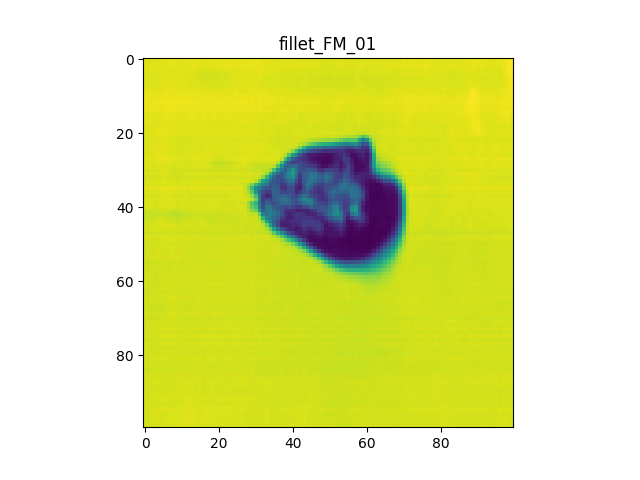

fillet_FM_01


<IPython.core.display.Javascript object>


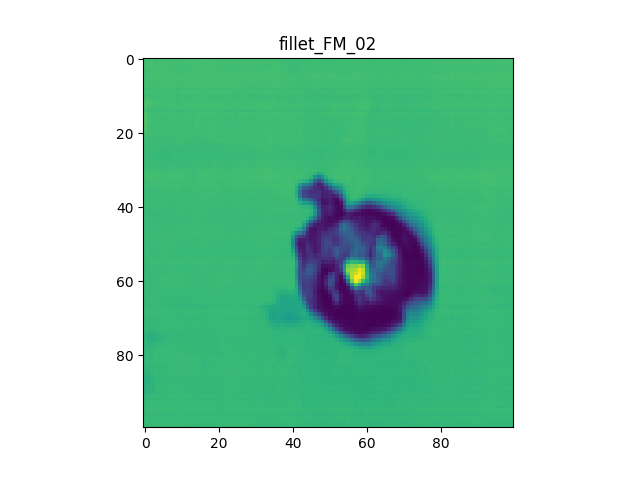

fillet_FM_02


<IPython.core.display.Javascript object>


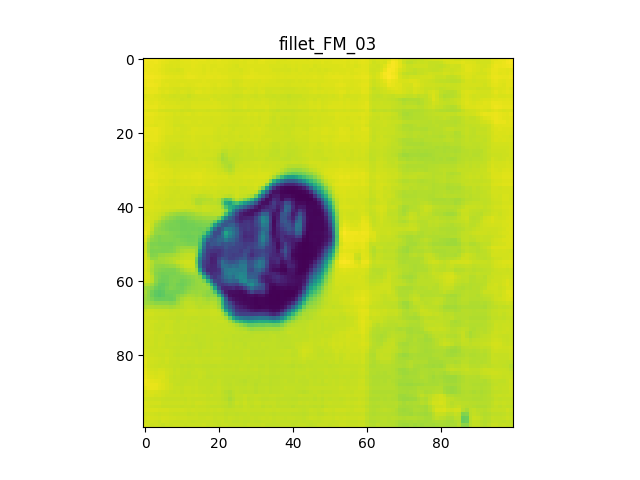

fillet_FM_03


<IPython.core.display.Javascript object>


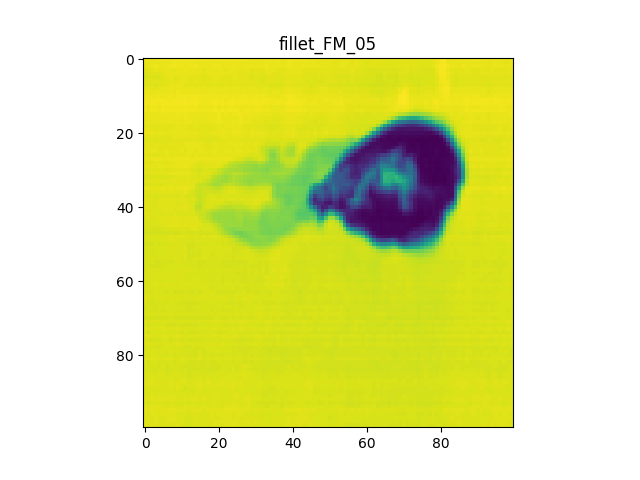

fillet_FM_05


<IPython.core.display.Javascript object>


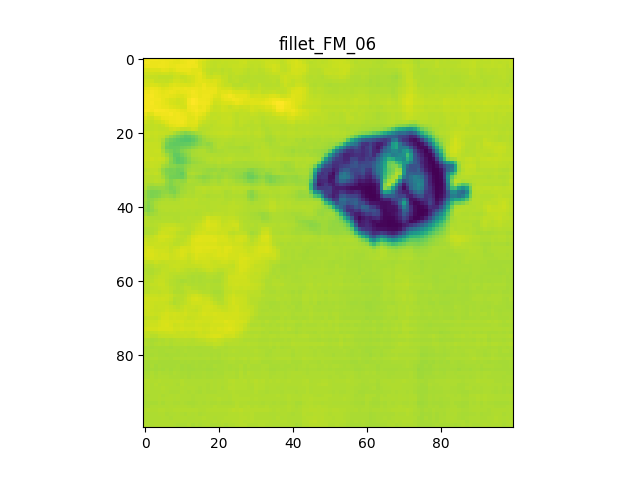

fillet_FM_06


In [7]:
names = list(data.keys())
names.sort()
for i, name in enumerate(names):
    # if 'FM_fillet_repeat_sample_B_38' in name or 'FM_fillet_repeat_sample_B_37' in name or 'FM_fillet_repeat_sample_B_36' in name or '20200213_120111_FM_fillet_repeat_sample_B_33' in name:
    # if '_fillet_sample3' in name:
    # if 'new_FM_fillet_sample_C' in name:
    # if '20200213_115827_FM_fillet_repeat_sample_B_28' in name or '20200213_114922_skinside_sample_B_21' in name or '20200213_114942_skinside_sample_B_22' in name or '20200213_115055_skinside_sample_B_25' in name or '20200213_115955_FM_fillet_repeat_sample_B_31' in name or '20200213_120912_new_FM_fillet_sample_C_22' in name or '20200213_121438_new_FM_fillet_sample_C_31' in name or '20200213_121453_new_FM_fillet_sample_C_32' in name:
    image = data[name]
    n, m, k = image.shape
    
    if n == 100 and m == 100 and i < 20:
    # if '_skinside_sample_' in name:
    # if '_skinside_sample_B_2' in name:
#     if n != 100 or m != 100:
        plt.figure()
        plt.title(name)
        plt.imshow(image[:, :, 138])
        print(name)
        
#         save_array_as_image(image, "TomraFiles/"+name+".tif")


## Investigating the 1 to 10 plastic film stacking
Re-loding the corresponding images to precerve the pixel coordinates

In [8]:
# Read chicken fillet 10 film stacking images
film_files = ['20200213_113826_fillet_sample30.mat',
 '20200213_113854_fillet_sample31.mat',
 '20200213_113925_fillet_sample32.mat',
 '20200213_113949_fillet_sample33.mat',
 '20200213_114007_fillet_sample34.mat',
 '20200213_114025_fillet_sample35.mat',
 '20200213_114052_fillet_sample36.mat',
 '20200213_114111_fillet_sample37.mat',
 '20200213_114129_fillet_sample38.mat',
 '20200213_114148_fillet_sample39.mat']
filePath = '../data/TomraData/day2'

film_data = {}
for file_name in film_files:
    full_file_name = os.path.join(filePath, file_name)
    matlab_mat = loadmat(full_file_name)
    film_data[file_name[:-4]] = np.array(matlab_mat['image'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


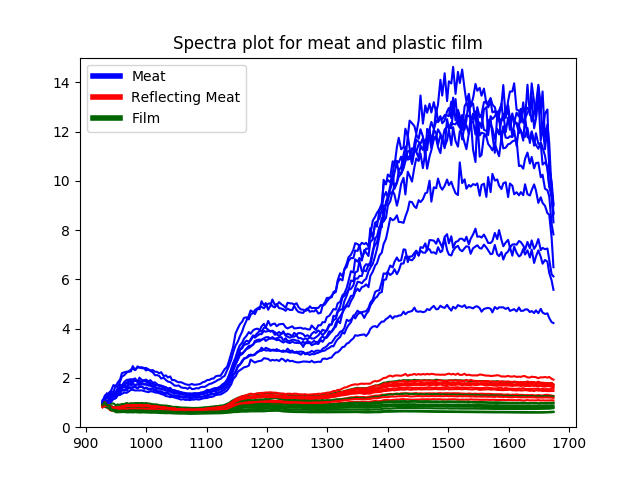

(0, 15)

In [9]:
def to_title(name):
    words = name.split('_')
    words = [word.capitalize() for word in words]
    title = " ".join(words)
    return title
    
def plot_pixel_spectra(data, **points):
    colors = ['Blue', 'Red', 'DarkGreen', 'Black', 'Magenta', 'Cyan', 'Yellow', 'White', 'DarkBlue']
    
    items = points.keys()
    for i, item in enumerate(items):
        x, y = points[item]
        plt.plot(index, 25/data[y, x, :], color=colors[i])
    
fig = plt.figure()
plt.title("Spectra plot for meat and plastic film")
plot_pixel_spectra(film_data['20200213_113826_fillet_sample30'], meat=(46, 111)
                                                          , reflecting_meat=(34, 77)
                                                          , film=(45, 83))
plot_pixel_spectra(film_data['20200213_113854_fillet_sample31'], meat=(68, 116)
                                                          , reflecting_meat=(56, 83)
                                                          , film=(64, 92))
plot_pixel_spectra(film_data['20200213_113925_fillet_sample32'], meat=(58, 139 )
                                                          , reflecting_meat=(51, 100)
                                                          , film=(61, 113))
plot_pixel_spectra(film_data['20200213_113949_fillet_sample33'], meat=(65, 108)
                                                          , reflecting_meat=(52, 75)
                                                          , film=(62, 86))
plot_pixel_spectra(film_data['20200213_114007_fillet_sample34'], meat=(78, 117)
                                                          , reflecting_meat=(67, 81)
                                                          , film=(77, 92))
plot_pixel_spectra(film_data['20200213_114025_fillet_sample35'], meat=(50, 122)
                                                          , reflecting_meat=(37, 83)
                                                          , film=(45, 92))
plot_pixel_spectra(film_data['20200213_114052_fillet_sample36'], meat=(62, 115)
                                                          , reflecting_meat=(48, 77)
                                                          , film=(58, 86))
plot_pixel_spectra(film_data['20200213_114111_fillet_sample37'], meat=(53, 113)
                                                          , reflecting_meat=(42, 93)
                                                          , film=(51, 81))
plot_pixel_spectra(film_data['20200213_114129_fillet_sample38'], meat=(58, 130)
                                                          , reflecting_meat=(42, 101)
                                                          , film=(54, 100))
plot_pixel_spectra(film_data['20200213_114148_fillet_sample39'], meat=(56, 124)
                                                          , reflecting_meat=(46, 100)
                                                          , film=(57, 92))

ax = fig.axes[0]
ax.legend([Line2D([0], [0], color='Blue', lw=4),
           Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='DarkGreen', lw=4)], ['Meat', 'Reflecting Meat', 'Film']);

plt.ylim(0, 15)

The selected optimal values for w and p are 21 and 6 respectively. See *Code/Scripts/SpectralDimensionReduction.ipynb* for clarification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


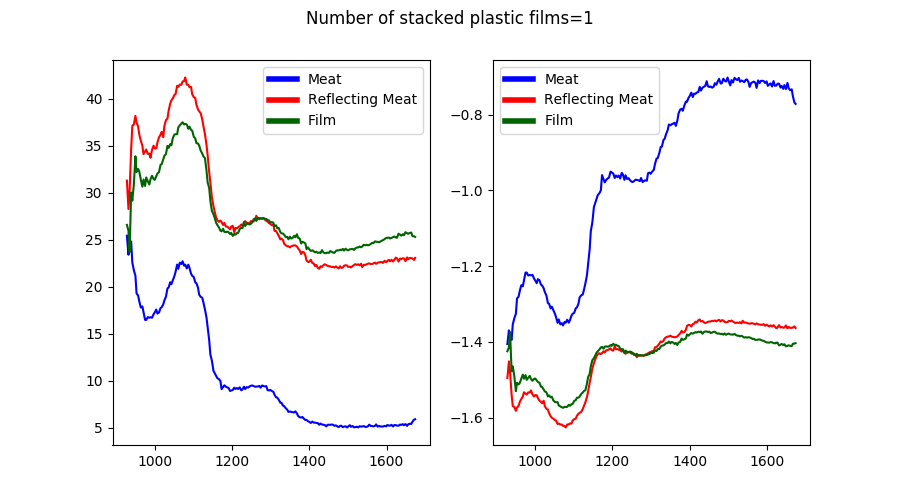

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


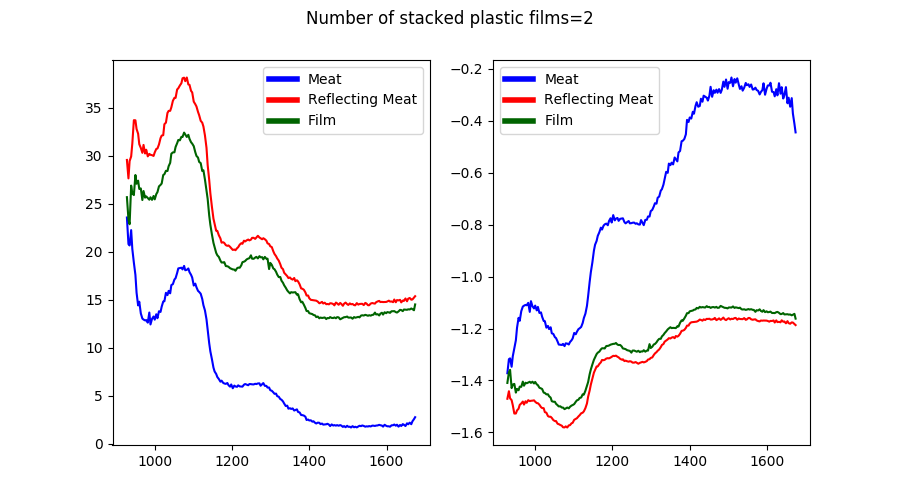

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


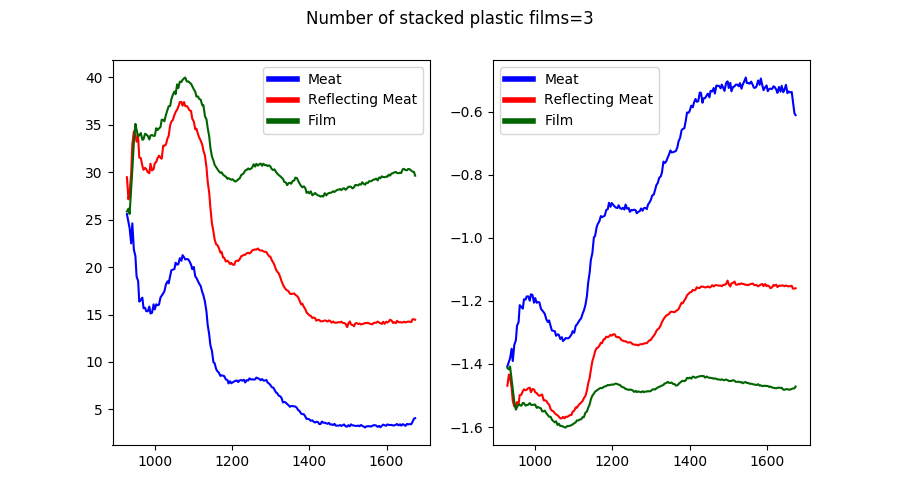

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


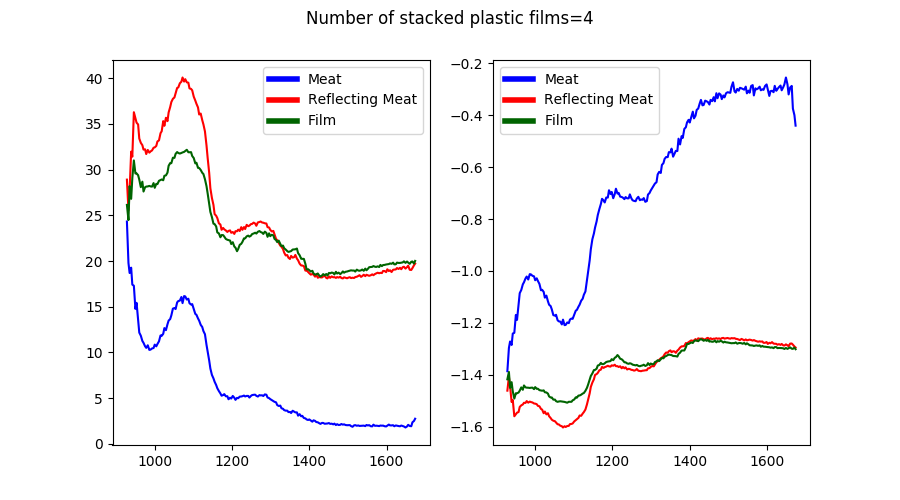

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


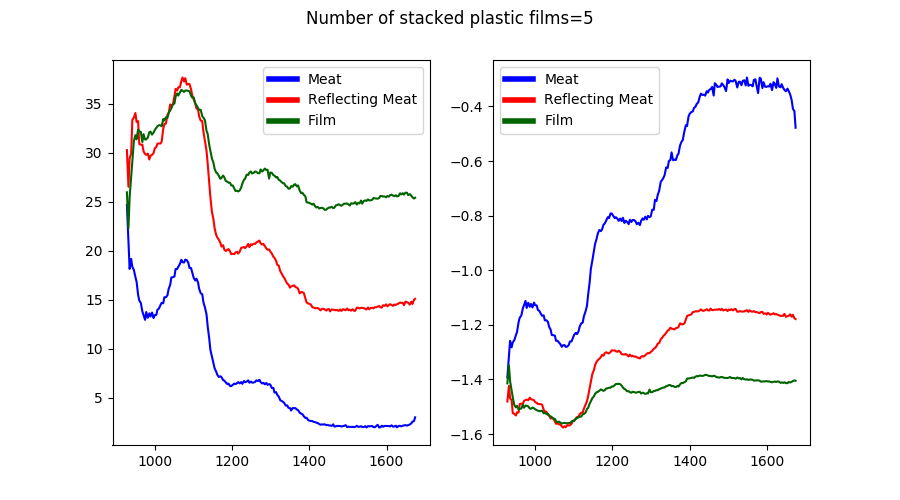

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


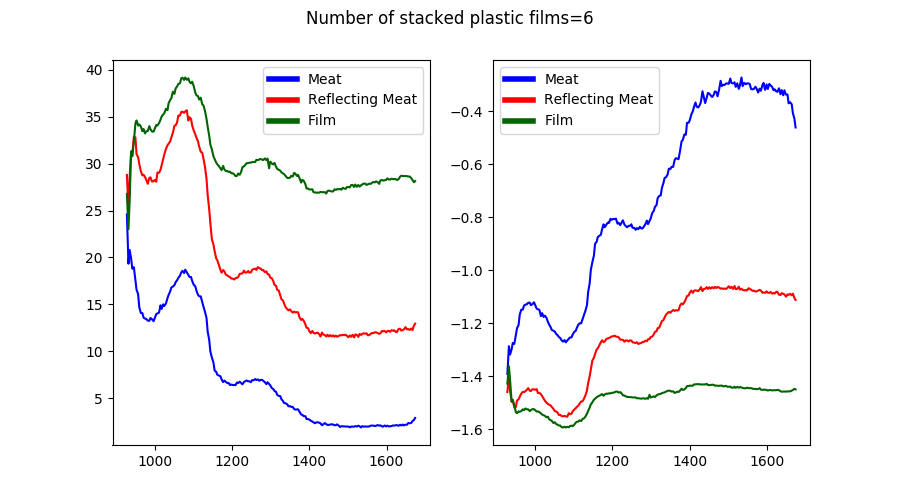

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


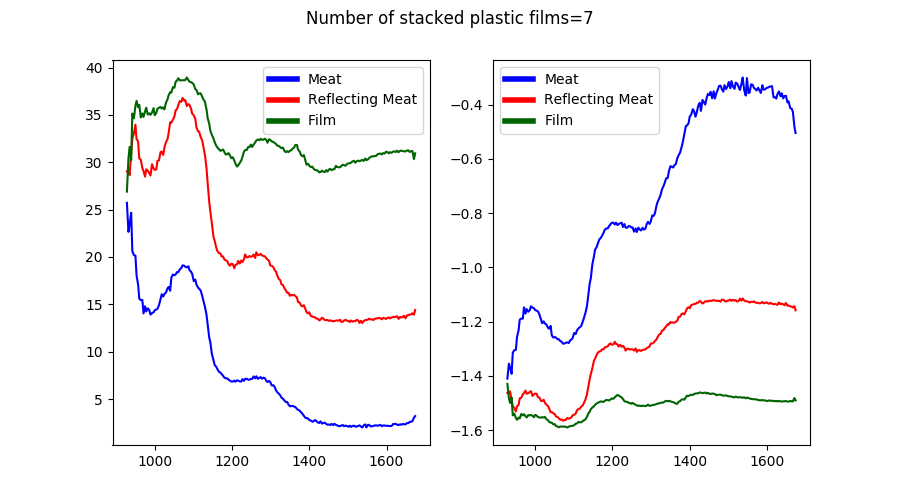

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


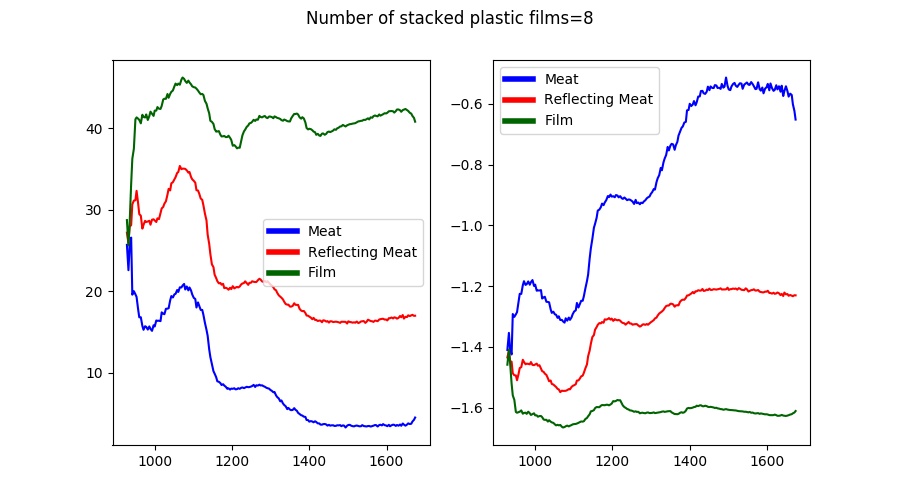

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


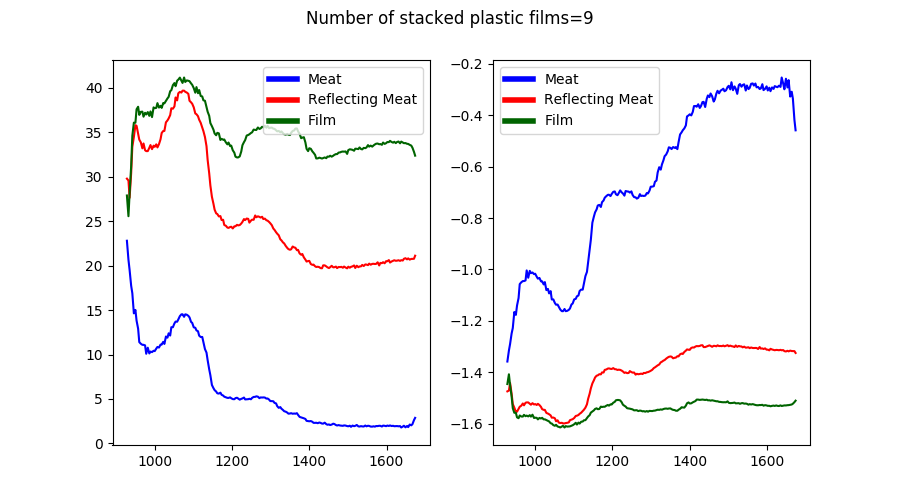

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


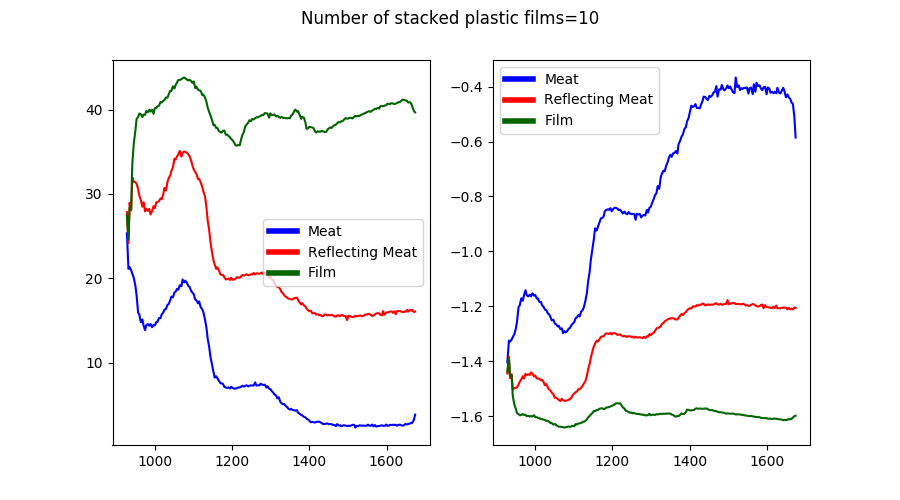

In [10]:
w, p = 21, 6

def plot_pixel_spectra(data, film_count, **points):
    colors = ['Blue', 'Red', 'DarkGreen', 'Black', 'Magenta', 'Cyan', 'Yellow', 'White', 'DarkBlue']
    
    fig, axes = plt.subplots(figsize=(9, 5), nrows=1, ncols=2)
    items = points.keys()
    for i, item in enumerate(items):
        x, y = points[item]
        axes[0].plot(index, data[y, x, :], color=colors[i])
        
#         data_deriv = scipy.signal.savgol_filter(data[y, x, :], window_length=w, polyorder=p, deriv=1)
#         axes[1].plot(data_deriv, color=colors[i])
        axes[1].plot(index, np.log10(1/data[y, x, :]), color=colors[i])
        
    axes[0].legend([Line2D([0], [0], color='Blue', lw=4),
               Line2D([0], [0], color='Red', lw=4),
               Line2D([0], [0], color='DarkGreen', lw=4)], ['Meat', 'Reflecting Meat', 'Film']);
    
    axes[1].legend([Line2D([0], [0], color='Blue', lw=4),
               Line2D([0], [0], color='Red', lw=4),
               Line2D([0], [0], color='DarkGreen', lw=4)], ['Meat', 'Reflecting Meat', 'Film']);
#     plt.ylim(0, 1.2)
    
    fig.suptitle(f"Number of stacked plastic films={film_count}")
    
plot_pixel_spectra(film_data['20200213_113826_fillet_sample30'], '1', meat=(46, 111)
                                                          , reflecting_meat=(34, 77)
                                                          , film=(45, 83))
plot_pixel_spectra(film_data['20200213_113854_fillet_sample31'], '2', meat=(68, 116)
                                                          , reflecting_meat=(56, 83)
                                                          , film=(64, 92))
plot_pixel_spectra(film_data['20200213_113925_fillet_sample32'], '3', meat=(58, 139 )
                                                          , reflecting_meat=(51, 100)
                                                          , film=(61, 113))
plot_pixel_spectra(film_data['20200213_113949_fillet_sample33'], '4', meat=(65, 108)
                                                          , reflecting_meat=(52, 75)
                                                          , film=(62, 86))
plot_pixel_spectra(film_data['20200213_114007_fillet_sample34'], '5', meat=(78, 117)
                                                          , reflecting_meat=(67, 81)
                                                          , film=(77, 92))
plot_pixel_spectra(film_data['20200213_114025_fillet_sample35'], '6', meat=(50, 122)
                                                          , reflecting_meat=(37, 83)
                                                          , film=(45, 92))
plot_pixel_spectra(film_data['20200213_114052_fillet_sample36'], '7', meat=(62, 115)
                                                          , reflecting_meat=(48, 77)
                                                          , film=(58, 86))
plot_pixel_spectra(film_data['20200213_114111_fillet_sample37'], '8', meat=(53, 113)
                                                          , reflecting_meat=(42, 93)
                                                          , film=(51, 81))
plot_pixel_spectra(film_data['20200213_114129_fillet_sample38'], '9', meat=(58, 130)
                                                          , reflecting_meat=(42, 101)
                                                          , film=(54, 100))
plot_pixel_spectra(film_data['20200213_114148_fillet_sample39'], '10', meat=(56, 124)
                                                          , reflecting_meat=(46, 100)
                                                          , film=(57, 92))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


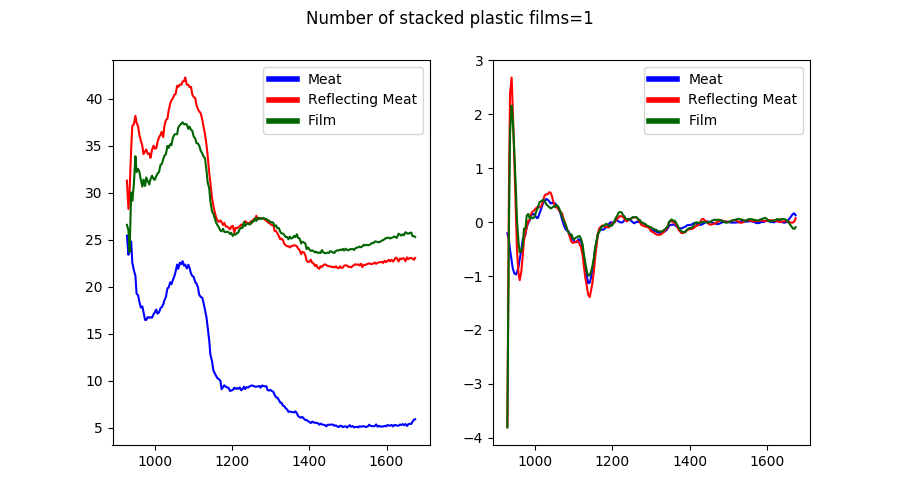

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


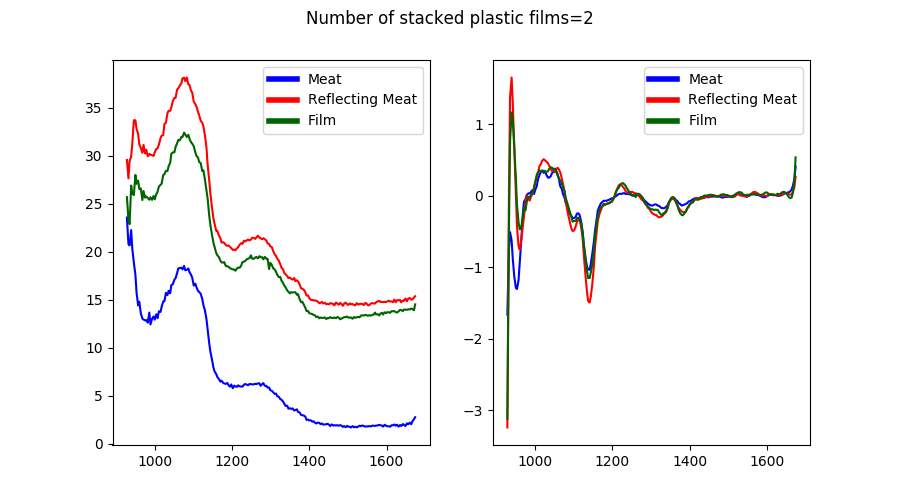

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


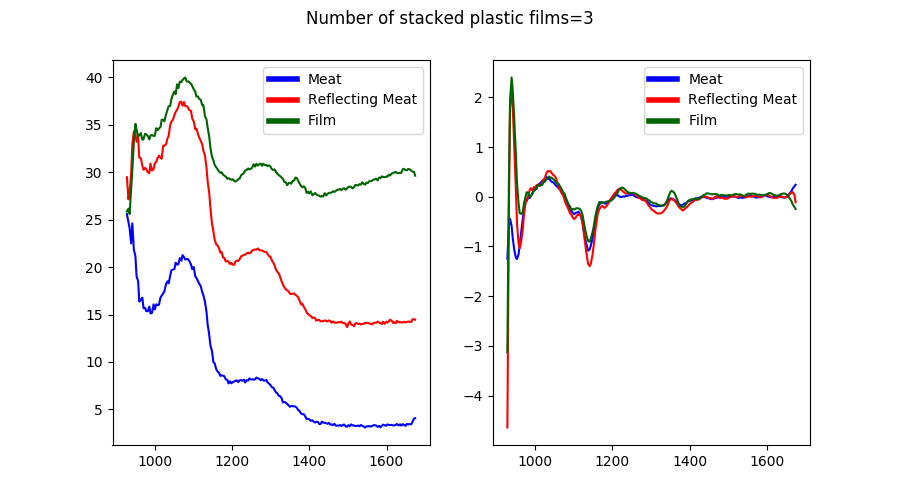

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


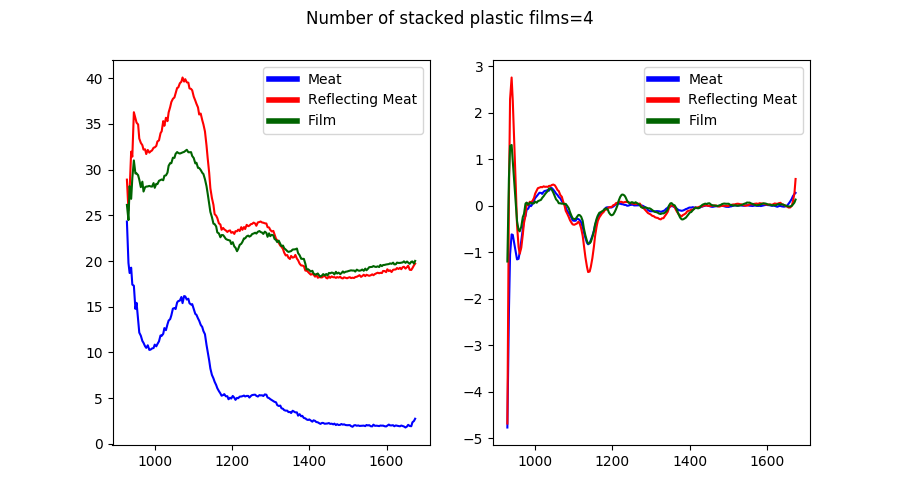

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


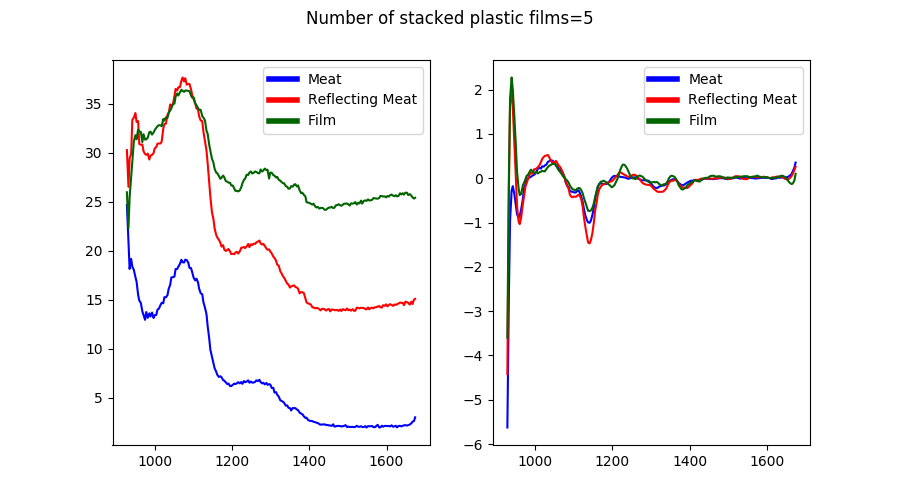

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


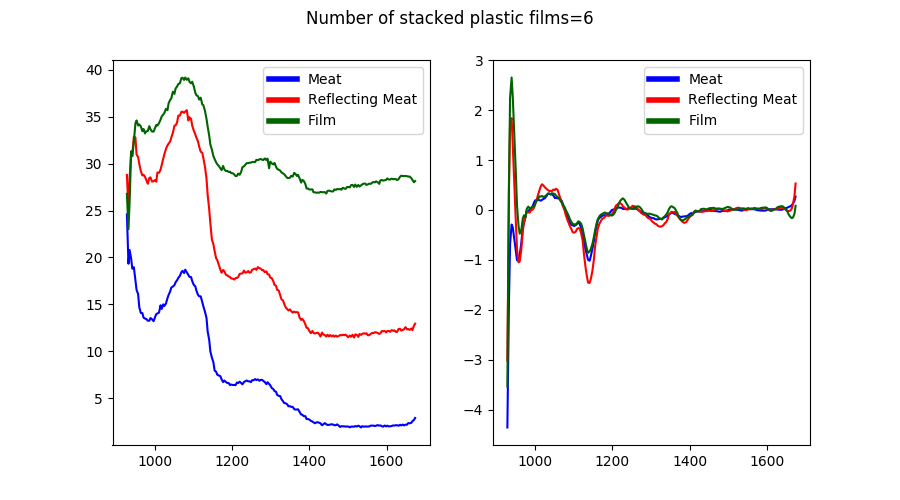

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


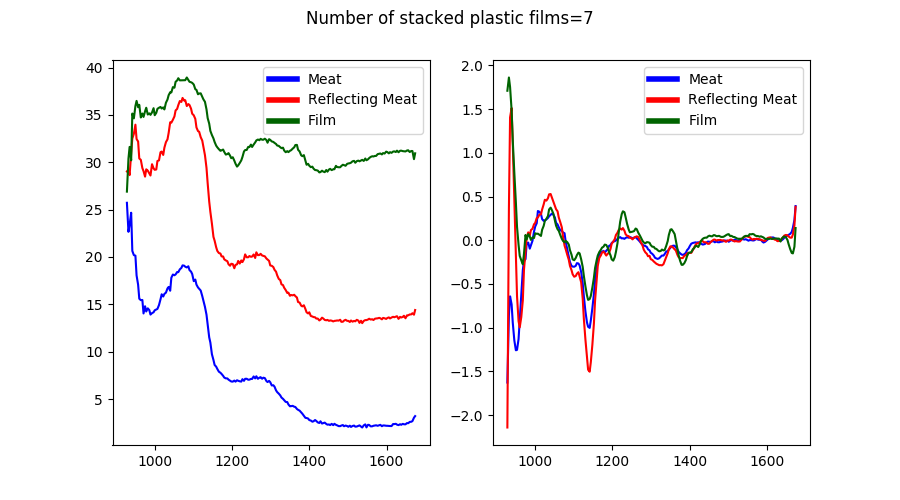

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


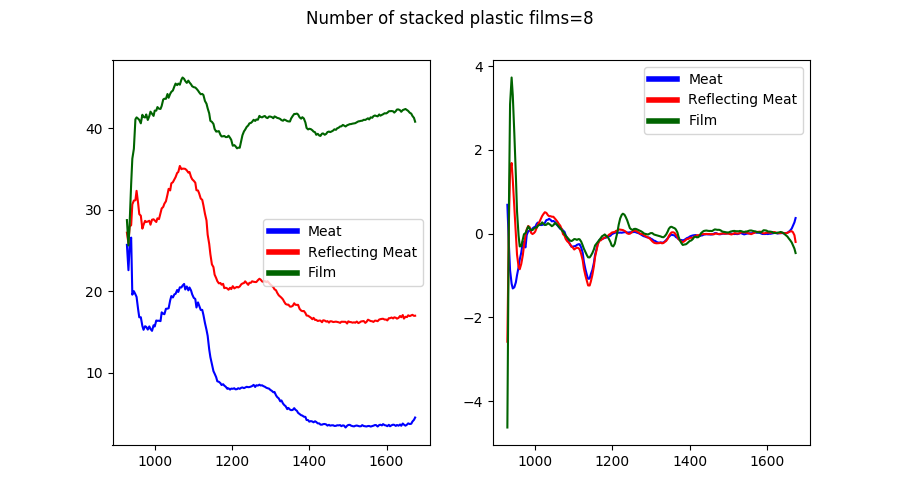

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


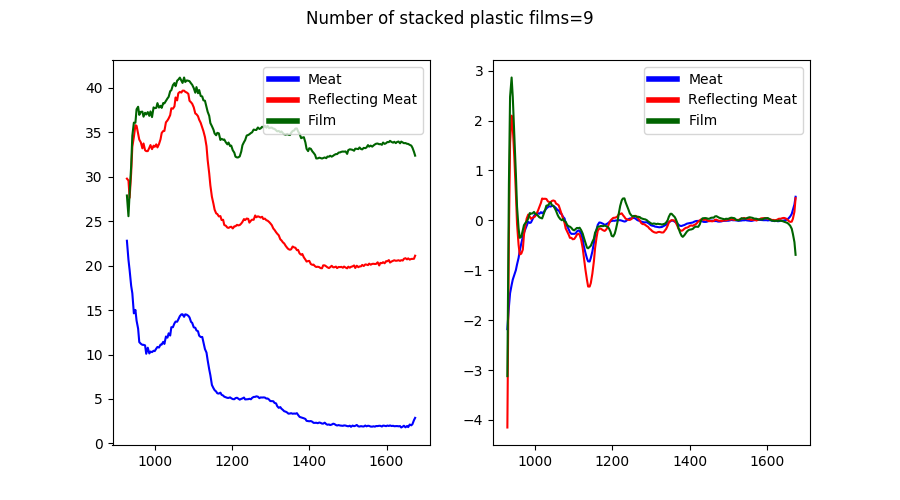

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


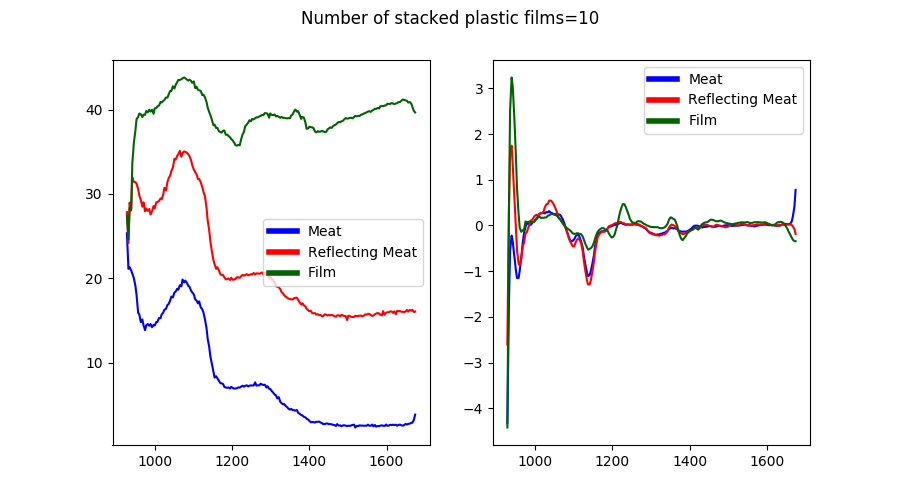

In [11]:
w, p = 21, 6

def plot_pixel_spectra(data, film_count, **points):
    colors = ['Blue', 'Red', 'DarkGreen', 'Black', 'Magenta', 'Cyan', 'Yellow', 'White', 'DarkBlue']
    
    fig, axes = plt.subplots(figsize=(9, 5), nrows=1, ncols=2)
    items = points.keys()
    for i, item in enumerate(items):
        x, y = points[item]
        axes[0].plot(index, data[y, x, :], color=colors[i])
        data_deriv = scipy.signal.savgol_filter(data[y, x, :], window_length=w, polyorder=p, deriv=1)
        axes[1].plot(index, data_deriv, color=colors[i])
        
    axes[0].legend([Line2D([0], [0], color='Blue', lw=4),
               Line2D([0], [0], color='Red', lw=4),
               Line2D([0], [0], color='DarkGreen', lw=4)], ['Meat', 'Reflecting Meat', 'Film']);
    
    axes[1].legend([Line2D([0], [0], color='Blue', lw=4),
               Line2D([0], [0], color='Red', lw=4),
               Line2D([0], [0], color='DarkGreen', lw=4)], ['Meat', 'Reflecting Meat', 'Film']);
    
    fig.suptitle(f"Number of stacked plastic films={film_count}")
    
plot_pixel_spectra(film_data['20200213_113826_fillet_sample30'], '1', meat=(46, 111)
                                                          , reflecting_meat=(34, 77)
                                                          , film=(45, 83))
plot_pixel_spectra(film_data['20200213_113854_fillet_sample31'], '2', meat=(68, 116)
                                                          , reflecting_meat=(56, 83)
                                                          , film=(64, 92))
plot_pixel_spectra(film_data['20200213_113925_fillet_sample32'], '3', meat=(58, 139 )
                                                          , reflecting_meat=(51, 100)
                                                          , film=(61, 113))
plot_pixel_spectra(film_data['20200213_113949_fillet_sample33'], '4', meat=(65, 108)
                                                          , reflecting_meat=(52, 75)
                                                          , film=(62, 86))
plot_pixel_spectra(film_data['20200213_114007_fillet_sample34'], '5', meat=(78, 117)
                                                          , reflecting_meat=(67, 81)
                                                          , film=(77, 92))
plot_pixel_spectra(film_data['20200213_114025_fillet_sample35'], '6', meat=(50, 122)
                                                          , reflecting_meat=(37, 83)
                                                          , film=(45, 92))
plot_pixel_spectra(film_data['20200213_114052_fillet_sample36'], '7', meat=(62, 115)
                                                          , reflecting_meat=(48, 77)
                                                          , film=(58, 86))
plot_pixel_spectra(film_data['20200213_114111_fillet_sample37'], '8', meat=(53, 113)
                                                          , reflecting_meat=(42, 93)
                                                          , film=(51, 81))
plot_pixel_spectra(film_data['20200213_114129_fillet_sample38'], '9', meat=(58, 130)
                                                          , reflecting_meat=(42, 101)
                                                          , film=(54, 100))
plot_pixel_spectra(film_data['20200213_114148_fillet_sample39'], '10', meat=(56, 124)
                                                          , reflecting_meat=(46, 100)
                                                          , film=(57, 92))